# Multiple Linear Regression: Predicting Wine Quality



In this notebook I create a **multidimensional linear regression** using the same red wine quality data.



We will:



- Use several chemical measurements of the wine to predict the quality score.

- Optionally apply a simple transformation ("linearization") to one skewed variable.

- Fit a multiple linear regression model and inspect its coefficients.

- Create **2D slice** visualizations: quality versus individual predictors.

- Check model diagnostics with predicted vs actual and residual plots.

- Compute goodness-of-fit statistics such as **MSE**, **RMSE**, and **R²**.


In [37]:
# Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(style="whitegrid", context="notebook")

In [38]:
# Load the red wine quality data
data_path = '../PCA/data/winequality-red.csv'
wine = pd.read_csv(data_path, sep=';')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Quick data overview

We start by looking at the variables and their ranges so we can decide which ones to use as predictors in our multiple regression model.

In [39]:
# Summary statistics for all variables
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## 2. Choosing predictors and simple linearization

Our response variable will again be `quality` (expert rating).

The dataset contains many potential numeric predictors, including:

- `alcohol`
- `sulphates`
- `volatile acidity`
- `citric acid`
- `residual sugar`

Since `residual sugar` is right-skewed, we will apply a simple transformation
`log_residual_sugar = log(1 + residual sugar)` to make its relationship with
quality a bit more linear aka
"linearization" step.

In [40]:
# Create a log-transformed version of residual sugar
wine['log_residual_sugar'] = np.log1p(wine['residual sugar'])

response = 'quality'
predictors = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'log_residual_sugar']

wine[predictors + [response]].head()

,alcohol,sulphates,volatile acidity,citric acid,log_residual_sugar,quality
0,9.4,0.56,0.70,0.00,1.064711,5
1,9.8,0.68,0.88,0.00,1.280934,5
2,9.8,0.65,0.76,0.04,1.193922,5
3,9.8,0.58,0.28,0.56,1.064711,6
4,9.4,0.56,0.70,0.00,1.064711,5


## 3. Fitting a multiple linear regression model

We now fit the multiple linear regression model from the book.

We use `statsmodels` so we can see coefficient estimates, standard errors, and
overall goodness-of-fit statistics.

In [41]:
# Build design matrix and fit multiple linear regression
X = wine[predictors]
y = wine[response]

X_const = sm.add_constant(X)  # add intercept
multi_model = sm.OLS(y, X_const).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          6.35e-139
Time:                        17:34:20   Log-Likelihood:                -1599.1
No. Observations:                1599   AIC:                             3210.
Df Residuals:                    1593   BIC:                             3242.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6506      0.207     12.797      0.000       2.244       3.057
alcohol                0.3092      0.016     19.482      0.000       0.278       0.340
sulphates              0.6952      0.103      6.736      0.000       0.493       0.898
volatile acidity      -1.2635      0.114    -11.090      0.000      -1.487      -1.040
citric acid           -0.0769      0.106     -0.723      0.470      -0.286       0.132
log_residual_sugar    -0.0059      0.063     -0.094      0.925      -0.129       0.117
==============================================================================
Omnibus:                       21.708   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.995
Skew:                          -0.103   Prob(JB):                     4.15e-08
Kurtosis:                       3.684   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. 2D slices: quality vs individual predictors

To visualize how each predictor is related to quality (while remembering that
the model uses them all at once), we plot 2D slices: scatterplots of quality
versus each predictor with a fitted simple regression line.

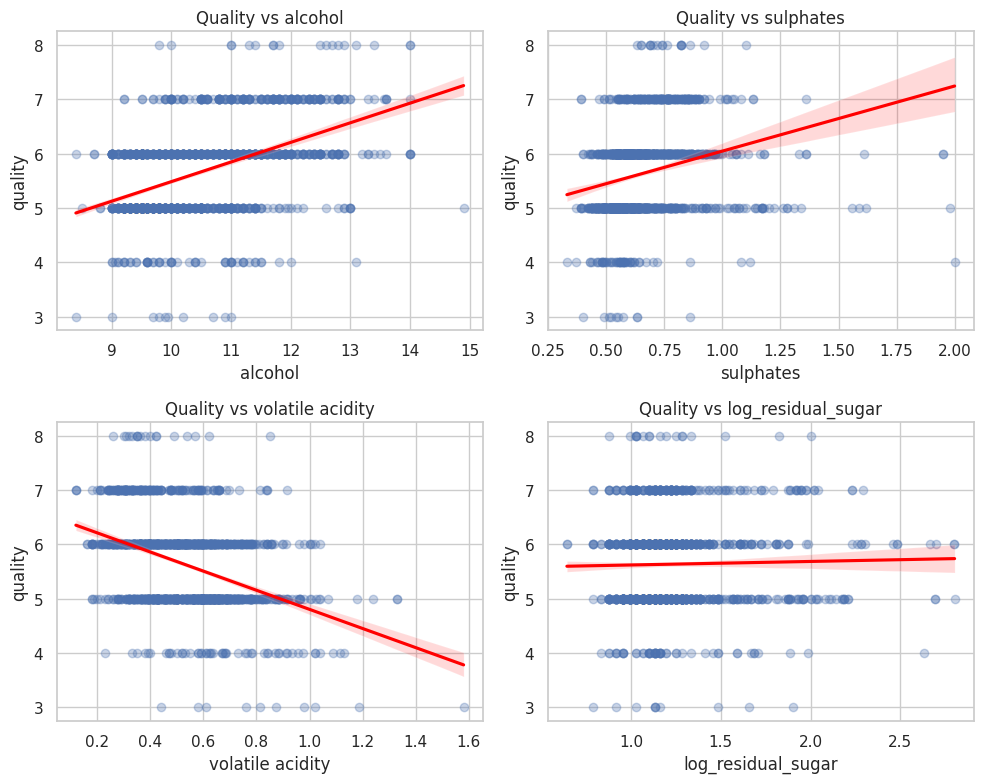

In [42]:
# 2D slices: quality vs each predictor
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

slice_vars = ['alcohol', 'sulphates', 'volatile acidity', 'log_residual_sugar']
for ax, var in zip(axes, slice_vars):
    sns.regplot(data=wine, x=var, y=response, ax=ax, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    ax.set_title(f'Quality vs {var}')

plt.tight_layout()
plt.show()

## 5. Model diagnostics: predicted vs actual and residuals

Next we check how well the model fits by comparing predicted values to the
observed quality scores and by looking at residuals (errors).

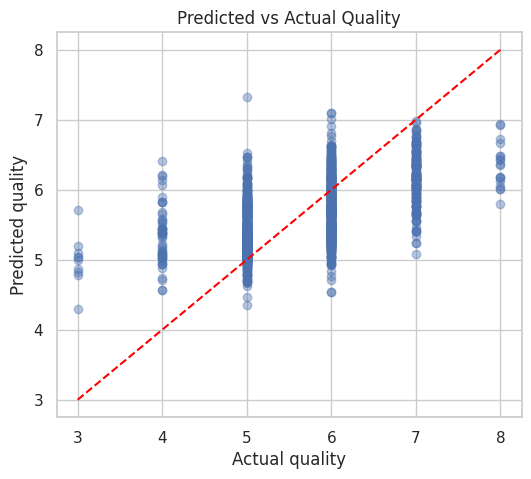

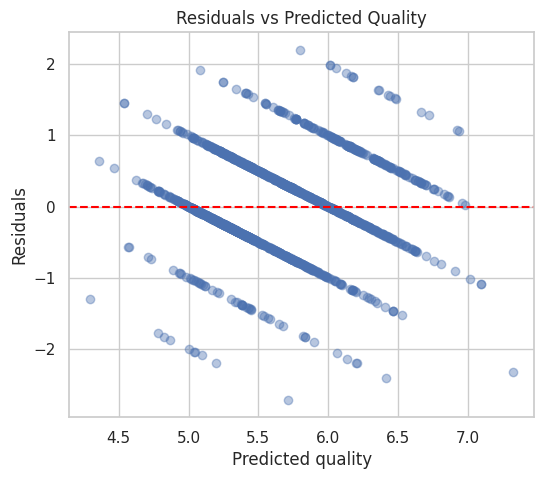

In [43]:
# Predicted vs actual quality
y_pred = multi_model.predict(X_const)
resid = y - y_pred

plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.title('Predicted vs Actual Quality')
plt.show()

# Residuals vs fitted values
plt.figure(figsize=(6, 5))
plt.scatter(y_pred, resid, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted quality')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Quality')
plt.show()

## 6. Goodness-of-fit statistics (MSE, RMSE, etc.)

Finally we compute standard goodness-of-fit measures for this model:

- **MSE (Mean Squared Error)** and **RMSE (Root Mean Squared Error)** based on the residuals.
- **MAE (Mean Absolute Error)** for average absolute deviation.
- **R²** and **adjusted R²** from the regression output.

In [44]:
# Compute goodness-of-fit statistics
mse = np.mean(resid**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(resid))

r2 = multi_model.rsquared
adj_r2 = multi_model.rsquared_adj

print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adj_r2:.4f}")

MSE:  0.4327
RMSE: 0.6578
MAE:  0.5156
R^2: 0.3361
Adjusted R^2: 0.3341


## 7. Interpretation

After exploring this multi‑dimensional linear regression, I'm glad I decided to do a wine quality project, because the results fit the assignment well and the plots gave some interesting insights. The predicted vs actual graph shows that the points cluster around the 45° line, so the model does pick up the basic pattern that higher quality wines tend to get higher predicted scores, but the spread of points is fairly wide, meaning predictions for individual wines are only moderately accurate and tend to be “shrunk” toward the middle. The residuals vs predicted plot shows residuals roughly centered around zero with no huge bias at any predicted quality level, and the diagonal bands are mainly due to the fact that quality is an integer rating, although the slight slope in those bands suggests the linear model still misses some non linear structure. Finally, the goodness of fit numbers show that typical errors are around a fraction of a quality point, and the R² and adjusted R² indicate that these chemical predictors explain a noticeable but not overwhelming share of the variation in quality, so other factors not in the model are still important.